In [1]:
from scipy import spatial
import libpysal as ps
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
points = np.array([[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
                   [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
                   [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
                   [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]])

In [3]:
import pointpats

In [4]:
from pointpats import g_test

In [5]:
g_res = g_test(points, support=10)

In [6]:
g_res.support

array([ 0.        ,  3.84791574,  7.69583148, 11.54374723, 15.39166297,
       19.23957871, 23.08749445, 26.93541019, 30.78332593, 34.63124168])

In [7]:
g_res.statistic

array([0.        , 0.        , 0.        , 0.16666667, 0.16666667,
       0.25      , 0.58333333, 0.83333333, 0.91666667, 1.        ])

In [8]:
g_res.pvalue

array([0.00e+00, 0.00e+00, 0.00e+00, 2.24e-02, 8.00e-04, 1.00e-04,
       4.90e-03, 5.91e-02, 7.53e-02, 0.00e+00])

## Keeping simulations

In [9]:
g_res = g_test(points, support=10, keep_simulations=True)

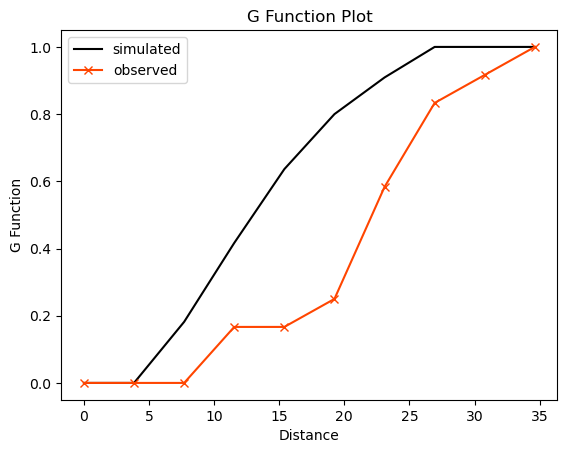

In [10]:
plt.plot(g_res.support, np.median(g_res.simulations, axis=0), 
         color='k', label='simulated')
plt.plot(g_res.support, g_res.statistic, 
         marker='x', color='orangered', label='observed')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('G Function Plot')
plt.show()

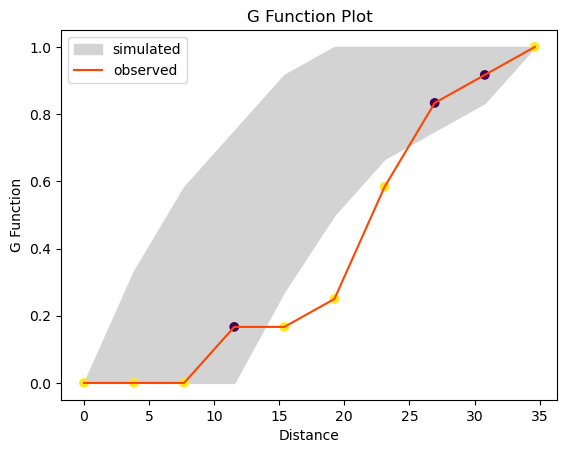

In [11]:
# grab the middle 95% of simulations using numpy:
middle_95pct = np.percentile(g_res.simulations, q=(2.5, 97.5), axis=0)
# use the fill_between function to color between the 2.5% and 97.5% envelope
plt.fill_between(g_res.support, *middle_95pct, 
                 color='lightgrey', label='simulated')

# plot the line for the observed value of G(d)
plt.plot(g_res.support, g_res.statistic, 
         color='orangered', label='observed')
# and plot the support points depending on whether their p-value is smaller than .05
plt.scatter(g_res.support, g_res.statistic, 
            cmap='viridis', c=g_res.pvalue < .01)
plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('G Function Plot')
plt.show()

## F function

In [12]:
from pointpats import f_test as f

In [13]:
f_test = f(points, support = g_res.support, keep_simulations=True, hull='convex', n_simulations=999)


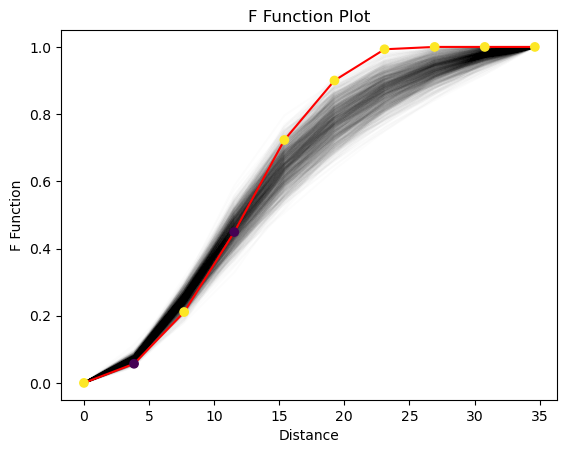

In [14]:
plt.plot(f_test.support, f_test.simulations.T, alpha=.01, color='k')
plt.plot(f_test.support, f_test.statistic, color='red')

plt.scatter(f_test.support, f_test.statistic, 
            cmap='viridis', c=f_test.pvalue < .05,
            zorder=4 # make sure they plot on top
           )

plt.xlabel('Distance')
plt.ylabel('F Function')
plt.title('F Function Plot')
plt.show()

plt.show()

## J Function

In [15]:
from pointpats import j_test as j

In [16]:
jp1 = j(points, support=20)

/tmp/ipykernel_22831/134666654.py:1: UserWarning: requested 20 bins to evaluate the J function, but it reaches infinity at d=34.6312, meaning only 20 bins will be used to characterize the J function.
  jp1 = j(points, support=20)


Text(0, 0.5, 'J Function')

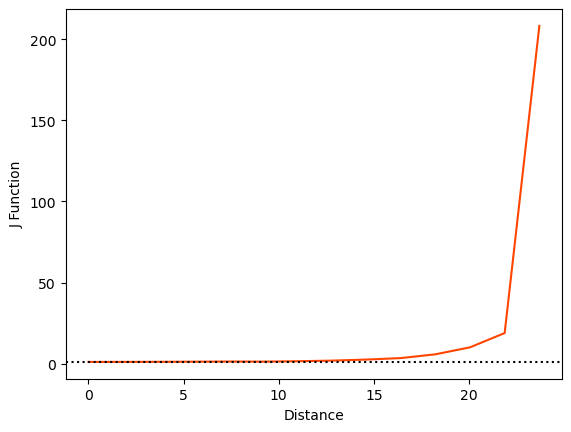

In [17]:
plt.plot(jp1.support, jp1.statistic, color='orangered')
plt.axhline(1, linestyle=':', color='k')
plt.xlabel('Distance')
plt.ylabel('J Function')

## K Function

In [18]:
from pointpats import k_test as k

In [19]:
k_test = k(points, keep_simulations=True, n_simulations=99)

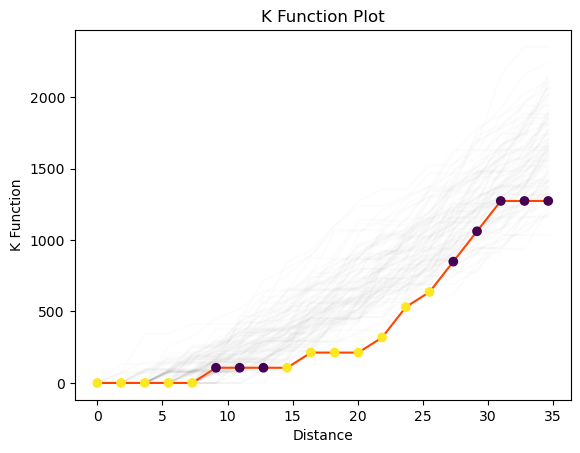

In [20]:
plt.plot(k_test.support, k_test.simulations.T, color='k', alpha=.01)
plt.plot(k_test.support, k_test.statistic, color='orangered')

plt.scatter(k_test.support, k_test.statistic, 
            cmap='viridis', c=k_test.pvalue < .05,
            zorder=4 # make sure they plot on top
           )

plt.xlabel('Distance')
plt.ylabel('K Function')
plt.title('K Function Plot')
plt.show()

## CSR Example

In [21]:
import geopandas
import libpysal as ps
df = geopandas.read_file(ps.examples.get_path("vautm17n.shp"))
state = df.geometry.cascaded_union

/tmp/ipykernel_22831/3264935310.py:4: FutureWarning: The 'cascaded_union' attribute is deprecated, use 'unary_union' instead
  state = df.geometry.cascaded_union


In [22]:
from pointpats.random import poisson

In [23]:
csr = poisson(state, size=100)

In [24]:
csr[0:5]

array([[ 794296.03601669, 4294601.31407386],
       [ 818282.99012297, 4184155.14330324],
       [ 905034.27199013, 4056241.87208028],
       [ 663747.80016769, 4047823.01271924],
       [ 766179.63918103, 4051312.78930823]])

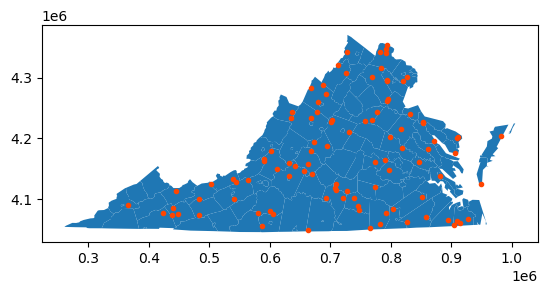

In [25]:
df.plot()
plt.scatter(*csr.T, color='orangered', marker=".")
plt.show()

In [26]:
realizations = poisson(state, size=(100,100))

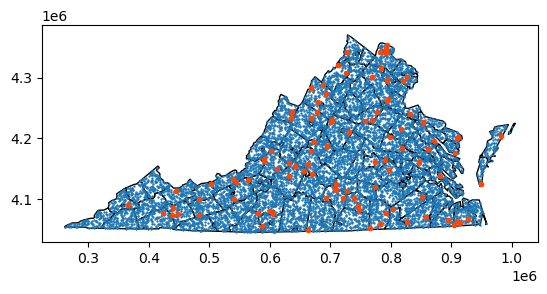

In [27]:
df.plot(facecolor='none', edgecolor='k')
plt.scatter(*realizations.T, marker='.', s=2)
plt.scatter(*csr.T, color='orangered', marker='.')
plt.show()

In [28]:
from pointpats import g

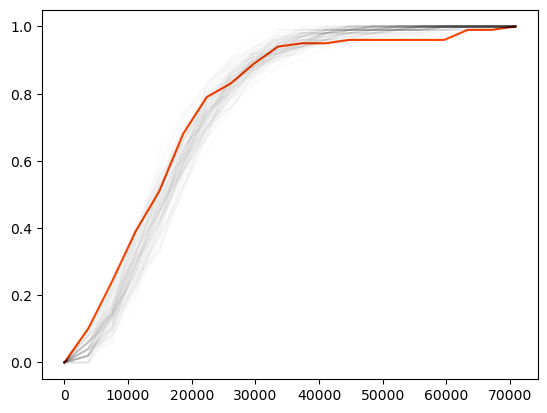

In [29]:
observed_g = g(csr)

comparison_g = [ g(realization, support=observed_g[0])
                for realization in realizations]

plt.plot(*observed_g, color='orangered')
[plt.plot(*comparison, color='k', alpha=.01) 
 for comparison in comparison_g]
plt.show()

## Clustered Process

In [30]:
from pointpats.random import cluster_poisson
import numpy

In [31]:
numpy.random.seed(1234567)
clust = cluster_poisson(state, size=100, n_seeds=3,
                       cluster_radius=100000)

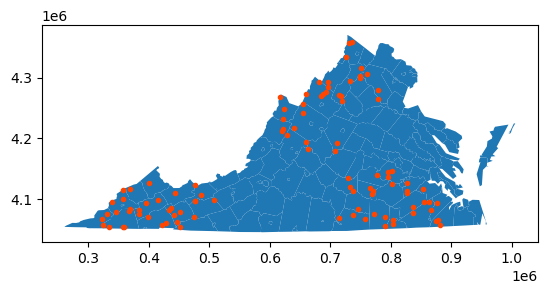

In [32]:
df.plot()
plt.scatter(*clust.T, color='orangered', marker=".")
plt.show()

In [33]:
observed_g_clust = g(clust)

comparison_g = [ g(realization, support=observed_g[0])
                for realization in realizations]

plt.plot(*observed_g_csr, color='orangered', label='CSR')
plt.plot(*observed_g_clust, color='blue', label='Clustered')
[plt.plot(*comparison, color='k', alpha=.01) 
 for comparison in comparison_g]
plt.ylabel("G(d)")
plt.xlabel("d")
plt.legend()
plt.show()

NameError: name 'observed_g_csr' is not defined

In [ ]:
observed_g_csr = g(csr)